In [1]:
import pandas as pd
df=pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Label Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
le= LabelEncoder()

In [5]:
x = df.drop('smoker', axis=1)  
for column in x.columns:
    if x[column].dtype == 'object':
        x[column] = le.fit_transform(x[column])

In [6]:
x.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [8]:
y= df['smoker']
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# DecisionTree

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()

In [10]:
clf.fit(x,y)

DecisionTreeClassifier()

In [12]:
clf.predict([[29,0,27.900,0,3,16884.92400]])

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)

In [16]:
from matplotlib import pyplot as plt
x.columns
feature_names = x.columns.tolist()

In [18]:
from sklearn import tree 
plt.figure(figsize=(100,100))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=feature_names)

[Text(0.42846385542168675, 0.9583333333333334, 'charges <= 15294.714\ngini = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(0.18072289156626506, 0.875, 'charges <= 14453.74\ngini = 0.016\nsamples = 985\nvalue = [977, 8]'),
 Text(0.12048192771084337, 0.7916666666666666, 'charges <= 13736.672\ngini = 0.008\nsamples = 971\nvalue = [967, 4]'),
 Text(0.07228915662650602, 0.7083333333333334, 'bmi <= 17.338\ngini = 0.002\nsamples = 935\nvalue = [934, 1]'),
 Text(0.04819277108433735, 0.625, 'charges <= 9853.718\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.024096385542168676, 0.5416666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.07228915662650602, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0963855421686747, 0.625, 'gini = 0.0\nsamples = 929\nvalue = [929, 0]'),
 Text(0.1686746987951807, 0.7083333333333334, 'age <= 21.0\ngini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.14457831325301204, 0.625, 'bmi <= 29.99\ngini = 0.375\nsample

# confusion metrics

In [19]:
import numpy as np 
import seaborn as sns

<Axes: xlabel='bmi', ylabel='count'>

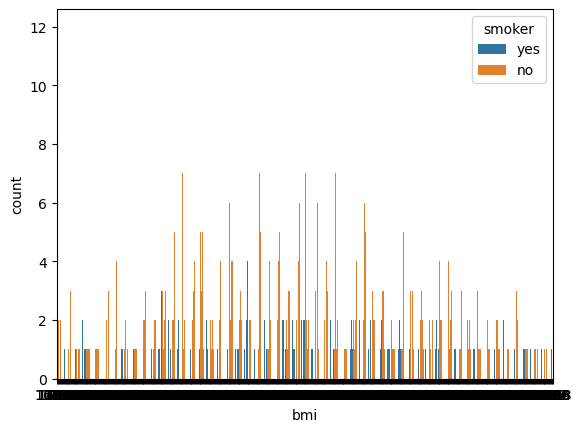

In [20]:
sns.countplot(x='bmi',data =df, hue='smoker')

<Axes: xlabel='region', ylabel='count'>

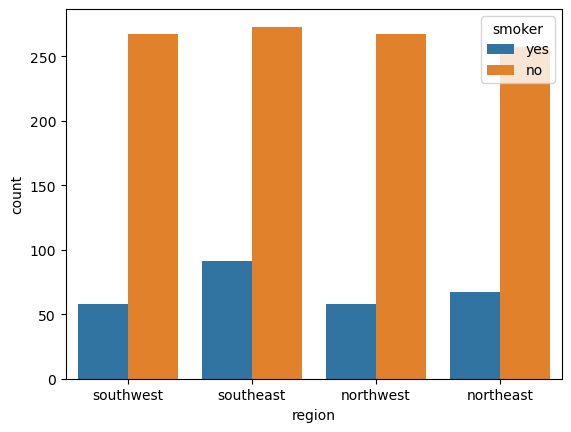

In [22]:
sns.countplot(x='region',data =df, hue='smoker')

In [23]:
from sklearn.model_selection import train_test_split as tts 

In [24]:
xtrain,xtest, ytrain,  ytest = tts(x,y,random_state=42, test_size=.30)

In [25]:
xtest.shape

(402, 6)

In [26]:
xtrain.shape

(936, 6)

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import confusion_matrix


In [29]:
pred=clf.predict(xtest)#predicted
pred

array(['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', '

In [30]:
np.array(ytest)#actual

array(['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'ye

In [31]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [32]:
tp

313

In [33]:
fn

10

In [34]:
fp

4

In [35]:
tn

75

In [38]:
precision= tp/(tp+fp)
precision

0.9873817034700315

In [40]:
Sensitivity = tp/(tp+fn)
Sensitivity

0.9690402476780186

In [42]:
fpr= fp/(fn +tn) 
fpr

0.047058823529411764

In [44]:
F1_measure = (precision+Sensitivity)/2
F1_measure

0.978210975574025

In [45]:
F1_score = (2*precision*Sensitivity)/(precision+Sensitivity)
F1_score

0.978125

In [47]:
FDR = fp/(fp+tp)
FDR

0.012618296529968454

In [48]:
CSI= tp/(tp+fn+fp)
CSI

0.9571865443425076

In [50]:
accuracy= (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9651741293532339

In [49]:
clf.score(xtest,ytest)

0.9651741293532339

In [51]:
cm=confusion_matrix(ytest,pred)

<Axes: >

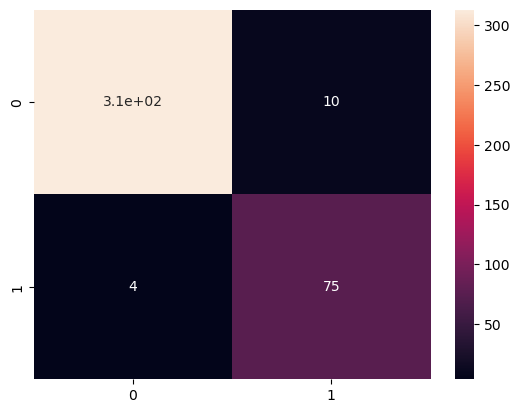

In [52]:
sns.heatmap(cm,annot=True)

In [53]:
from sklearn.metrics import classification_report , RocCurveDisplay, accuracy_score

In [54]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

          no       0.99      0.97      0.98       323
         yes       0.88      0.95      0.91        79

    accuracy                           0.97       402
   macro avg       0.93      0.96      0.95       402
weighted avg       0.97      0.97      0.97       402



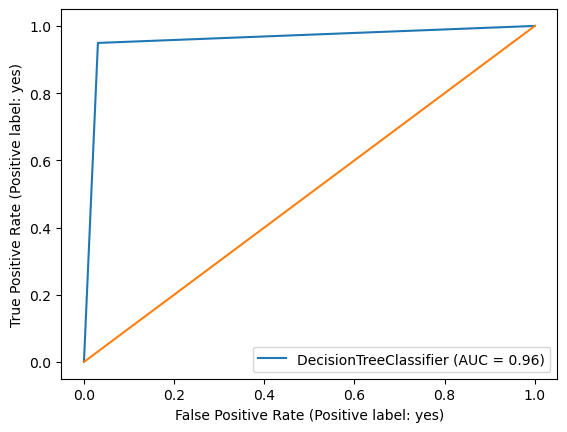

In [55]:
RocCurveDisplay.from_estimator(clf, xtest, ytest)
plt.plot([0,1],[0,1])